## Task 1:
### Problem - Develop and evaluate an image classifier using Convolution Neural Network.

### The Data = CIFAR 10 datset.

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.
https://www.cs.toronto.edu/~kriz/cifar.html


# CIFAR-10 Multiple Classes
# New section
Example of using Keras for CNNs. Use a famous data set, the CIFAR-10 dataset which consists of 10 different image types.

In [3]:
#
# Your code to import matplotlib, pandas and numpy libraries
#
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical

Following code loads the CIFAR 10 datset.

In [4]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Shape of training data (images): (50000, 32, 32, 3)
Shape of training data (labels): (50000, 1)
Shape of test data (images): (10000, 32, 32, 3)
Shape of test data (labels): (10000, 1)

First few examples of training images:


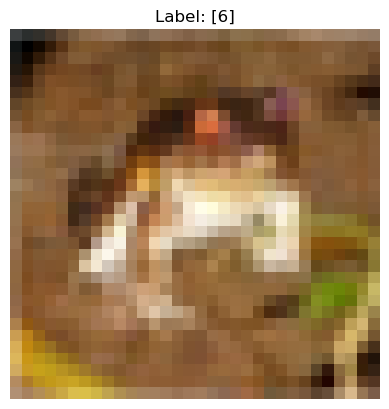

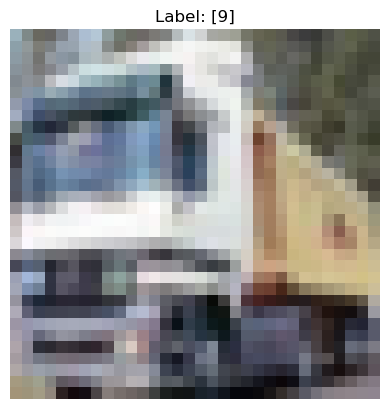

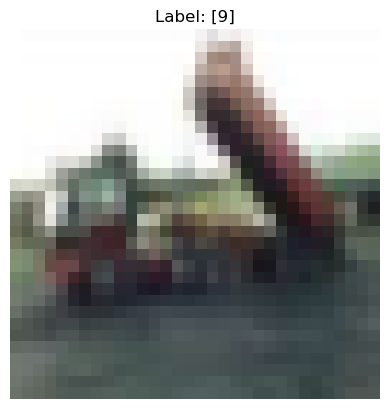

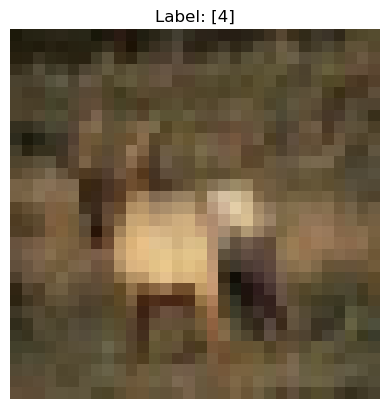

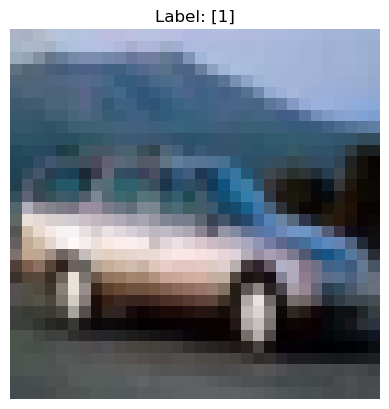


First few examples of test images:


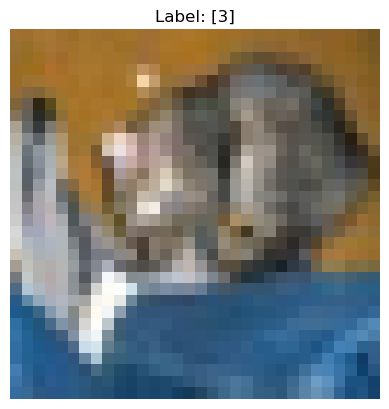

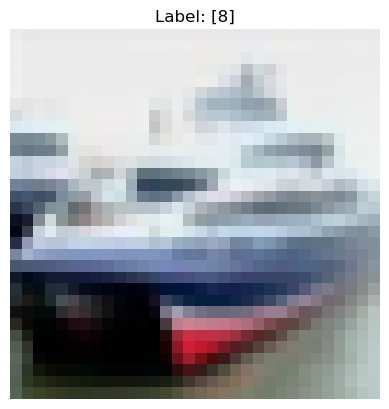

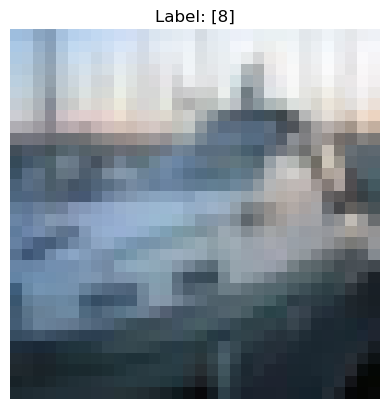

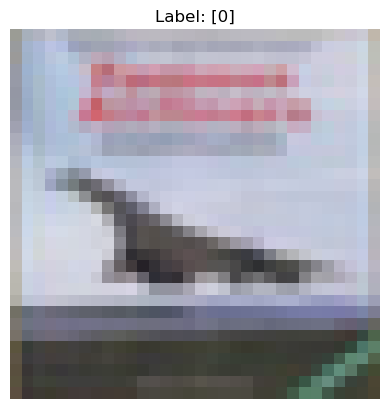

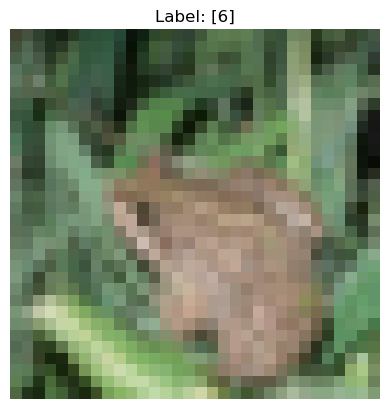

In [5]:
#
# Your code to print shapes of training and test data. Check how the data looks
#
# Print shapes of training and test data
print("Shape of training data (images):", x_train.shape)
print("Shape of training data (labels):", y_train.shape)
print("Shape of test data (images):", x_test.shape)
print("Shape of test data (labels):", y_test.shape)

# Check how the data looks (first few examples)
print("\nFirst few examples of training images:")
for i in range(5):
    plt.imshow(x_train[i])
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
    plt.show()

print("\nFirst few examples of test images:")
for i in range(5):
    plt.imshow(x_test[i])
    plt.title(f"Label: {y_test[i]}")
    plt.axis('off')
    plt.show()

In [6]:
# Your code to print the shape of one image.
# Choose an index to select an image from the dataset
image_index = 0  # For example, let's choose the first image

# Print the shape of the selected image
print("Shape of the selected image:", x_train[image_index].shape)

Shape of the selected image: (32, 32, 3)


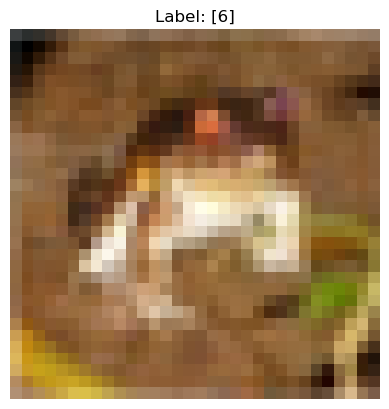

In [7]:
# Your code to show any sample image in the dataset. Use - plt.imshow()
import matplotlib.pyplot as plt

# Choose an index to select an image from the dataset
image_index = 0  # For example, let's choose the first image

# Display the selected image
plt.imshow(x_train[image_index])
plt.title(f"Label: {y_train[image_index]}")
plt.axis('off')
plt.show()

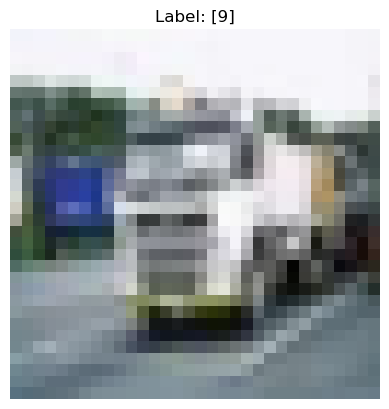

In [8]:
# Show any other image
import matplotlib.pyplot as plt

# Choose the index of the image you want to display
image_index = 1000  # For example, let's choose the 1000th image

# Display the selected image
plt.imshow(x_train[image_index])
plt.title(f"Label: {y_train[image_index]}")
plt.axis('off')
plt.show()

# PreProcessing

In [9]:
# Your code to print one image in digitals. Check how pixels look like. 
# Choose an index to select an image from the dataset
image_index = 0  # For example, let's choose the first image

# Print the pixel values of the selected image
print("Pixel values of the selected image:")
print(x_train[image_index])

Pixel values of the selected image:
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [10]:
# Your code to print shape of any image i.e particular value in the x_train
# Choose an index to select an image from the dataset
image_index = 0  # For example, let's choose the first image

# Print the shape of the selected image
print("Shape of the selected image:", x_train[image_index].shape)

Shape of the selected image: (32, 32, 3)


In [11]:
# Your code to print the maximum value in x_train. Hint - Use .max()
# Find the maximum value in x_train
max_value = x_train.max()

# Print the maximum value
print("Maximum value in x_train:", max_value)

Maximum value in x_train: 255


In [12]:
x_train = x_train/225
x_test = x_test/255

In [13]:
# Print the shape of x_train again.
print("Shape of x_train:", x_train.shape)

Shape of x_train: (50000, 32, 32, 3)


In [14]:
# Print the shape of y_train again.
print("Shape of y_train:", y_train.shape)

Shape of y_train: (50000, 1)


# One hot vector encoding.
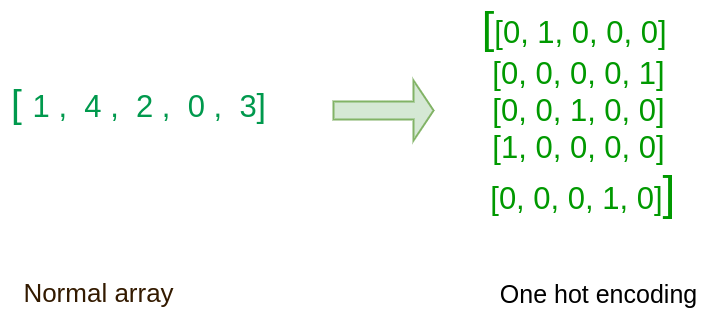


The "to_categorical()" is converting the integer value to binary categorical matrix :: https://keras.io/api/utils/python_utils/#to_categorical-functionLinks to an external site.

In [15]:
from tensorflow.keras.utils import to_categorical

# Your code to print shape of y_train [0]

# Your code to use to_categorical to convert integers to numbers. Assign the new array to the variable y_cat_train

print("Shape of the first label in y_train:", y_train[0].shape)

# Use to_categorical to convert integer labels to categorical format
y_cat_train = to_categorical(y_train)

# Print the shape of y_cat_train
print("Shape of y_cat_train:", y_cat_train.shape)

Shape of the first label in y_train: (1,)
Shape of y_cat_train: (50000, 10)


In [16]:
# Your code to print shape of the array y_cat_train
print("Shape of y_cat_train:", y_cat_train.shape)

Shape of y_cat_train: (50000, 10)


In [18]:
# Your code to print any single value in the array y_cat_train and print y_train with the same index.

# Compare the result for better understanding of "to_categorical()"
# Choosing an index to select a value from the arrays
index = 0  # For example, let's choose the first value

# Print the value in y_cat_train and the corresponding label in y_train
print("Value in y_cat_train:", y_cat_train[index])
print("Corresponding label in y_train:", y_train[index])

Value in y_cat_train: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Corresponding label in y_train: [6]


In [19]:
# Your code to:
# Convert y_test to the encoded vector in same manner/ Assign it to the variable y_cat_test

# Print the shapes to look how y_cat_test looks.
from tensorflow.keras.utils import to_categorical

# Convert y_test to the encoded vector
y_cat_test = to_categorical(y_test)

# Print the shapes of y_test and y_cat_test
print("Shape of y_test:", y_test.shape)
print("Shape of y_cat_test:", y_cat_test.shape)

Shape of y_test: (10000, 1)
Shape of y_cat_test: (10000, 10)


----------
# Building the Model

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

#### Please read the following links before creating code for the next cell

https://keras.io/api/layers/convolution_layers/convolution2d/
    
https://keras.io/api/layers/pooling_layers/max_pooling2d/

In [21]:
model = Sequential()


model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))

#
# Add more convolution and pooling layers with your choice of filters, strides, and activation function
#

# Adding more convolutional and pooling layers
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

#
# Add few dense layers. 
#

model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))  # Output layer with 10 units for 10 classes

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

### We could use early stopping in Keras to break from the training.
### What this does is for successive iterations it monitors the loss. If the loss does not decreases for a certain number of iterations denoted by variable 'patience' then the training stops.
### Following code shows how you can use early stopping.


In [23]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)

In [26]:
# Your code to compile the models (model.compile). Use 'categorical cross entropy' as the loss function
# and use 'accuracy' as the metrics
# Your can use the optimiser of your choice
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
# Your code to fit the model (model.fit). Use additional parameter -  callbacks = [early_stop] to eanable early stopping. 
# use 'history' array to save the training parameters for each epoch
from tensorflow.keras.callbacks import EarlyStopping
# Define EarlyStopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

# Fit the model
history = model.fit(x_train, y_cat_train, epochs=20, batch_size=32, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/20
1563/1563 [==============================] - 36s 23ms/step - loss: 0.4625 - accuracy: 0.8358 - val_loss: 0.9457 - val_accuracy: 0.6991
Epoch 2/20
1563/1563 [==============================] - 48s 31ms/step - loss: 0.4191 - accuracy: 0.8498 - val_loss: 0.9759 - val_accuracy: 0.7032
Epoch 3/20
1563/1563 [==============================] - 52s 33ms/step - loss: 0.3782 - accuracy: 0.8641 - val_loss: 1.0291 - val_accuracy: 0.7025
Epoch 4/20
1563/1563 [==============================] - 116s 74ms/step - loss: 0.3446 - accuracy: 0.8783 - val_loss: 1.1218 - val_accuracy: 0.6938
Epoch 4: early stopping


### We can save the model in a file. Following code shows how to do this.

In [29]:
# Careful, don't overwrite file!
model.save('cifar_10epochs.keras')

### We can save the loss at every step. Following code shows how to do this. 

In [30]:
losses = pd.DataFrame(model.history.history)

In [31]:
# Print first few rows of losses.
losses = history.history['loss']

# Print the first few rows of losses
print("First few rows of losses:")
for i, loss in enumerate(losses[:5]):
    print(f"Epoch {i+1}: {loss}")

First few rows of losses:
Epoch 1: 0.4624713361263275
Epoch 2: 0.41905829310417175
Epoch 3: 0.3782455325126648
Epoch 4: 0.3446176052093506


### Visualise a plot between accuracy vs val_accuracy for all steps.

### x axis will have the steps (epochs) 
### y axis will have accuracy and val_accuracy 





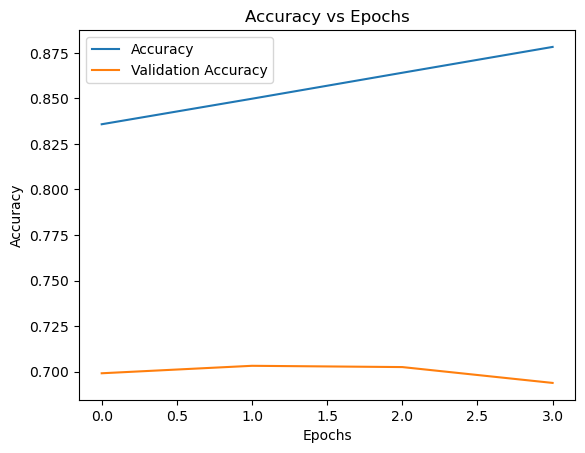

In [32]:
# 
# Your code to plot accuracy and val_accuracy vs the epochs
#
import matplotlib.pyplot as plt

# Plot accuracy vs epochs
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()
plt.show()

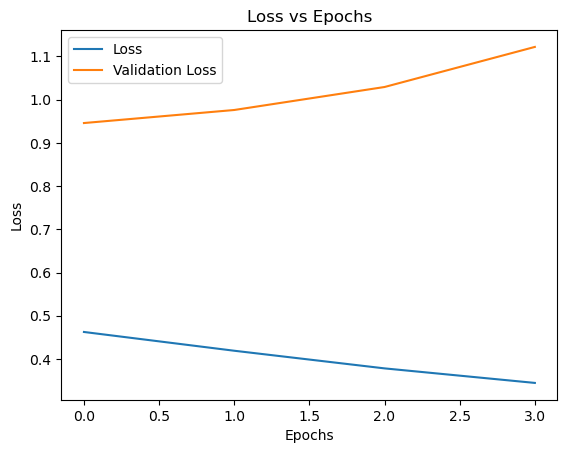

In [33]:
# 
# Your code to plot loss and val_loss vs the epochs
#
# Plot loss vs epochs
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.show()

### You could print the metrics name that model have used.

### Following code shows how to do this.

In [ ]:
model.metrics_names

['loss', 'accuracy']

### Following code shows how to evaluate your model.

In [34]:
model.evaluate(x_test,y_cat_test,verbose=0)

[1.1218085289001465, 0.6937999725341797]

### Make a prediction on test data set.   

In [35]:
predictions_prob = model.predict(x_test)
predictions = predictions_prob.argmax(axis = -1)

313/313 [==============================] - 4s 11ms/step


### We could get the full classification report. 

In [36]:
# Your code to import classification_report library from sklearn.metrics
from sklearn.metrics import classification_report

In [37]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.80      0.68      0.73      1000\n           1       0.86      0.82      0.84      1000\n           2       0.52      0.60      0.56      1000\n           3       0.54      0.44      0.49      1000\n           4       0.61      0.68      0.64      1000\n           5       0.67      0.51      0.58      1000\n           6       0.67      0.82      0.74      1000\n           7       0.82      0.69      0.75      1000\n           8       0.71      0.91      0.80      1000\n           9       0.79      0.80      0.79      1000\n\n    accuracy                           0.69     10000\n   macro avg       0.70      0.69      0.69     10000\nweighted avg       0.70      0.69      0.69     10000\n'

### We could also get and plot confusion matrix. 

https://github.com/matplotlib/matplotlib/issues/14751

In [40]:
# Your code to import confusion_matrix library from sklearn.metrics

# Predict probabilities for each class
y_pred_prob = model.predict(x_test)

# Get the class with the highest probability for each sample
y_pred = np.argmax(y_pred_prob, axis=1)

313/313 [==============================] - 4s 12ms/step


In [41]:
confusion_matrix(y_test,predictions)

array([[678,  21,  60,  15,  24,   1,  14,  11, 147,  29],
       [ 18, 820,   3,   4,   1,   2,  15,   2,  49,  86],
       [ 48,   9, 602,  48, 105,  34, 104,  15,  25,  10],
       [ 23,  12, 139, 443,  84, 116, 108,  24,  31,  20],
       [ 13,   3,  85,  47, 679,  27,  82,  43,  14,   7],
       [  4,   5, 131, 158,  66, 506,  60,  41,  18,  11],
       [  1,   3,  43,  50,  36,  13, 823,   7,  13,  11],
       [ 14,   4,  71,  41, 103,  45,  12, 687,   5,  18],
       [ 22,  16,  16,   6,  10,   3,   5,   2, 905,  15],
       [ 26,  59,  14,  11,   6,   5,  10,   6,  68, 795]], dtype=int64)

<AxesSubplot:>

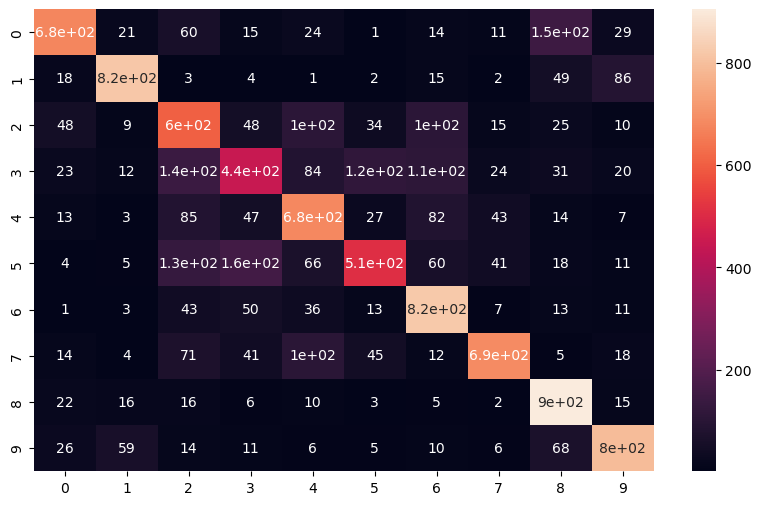

In [42]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)


# Following code makes a prediction on specific image.

In [43]:
my_image = x_test[16]

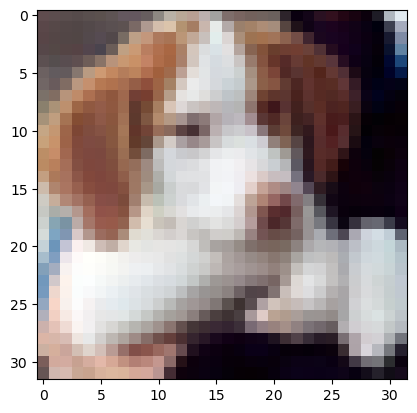

In [44]:
plt.imshow(my_image)

In [45]:
# SHAPE --> (num_images,width,height,color_channels)

model.predict(my_image.reshape(1,32,32,3))

1/1 [==============================] - 0s 29ms/step


array([[1.3503102e-03, 4.4918980e-04, 3.8498777e-03, 1.9606258e-01,
        3.9014692e-05, 7.2061306e-01, 1.1611602e-04, 7.5513944e-02,
        6.2686240e-04, 1.3789979e-03]], dtype=float32)

In [47]:
# Find the highest probability value in the vector above. 
# What output value does it point to?
import numpy as np

# Assuming you have your model predictions stored in a variable named 'y_pred_prob'
# Find the index of the highest probability value
highest_prob_index = np.argmax(y_pred_prob)

# Get the corresponding output value
output_value = highest_prob_index + 1  # Adding 1 because indexing starts from 0

print("Highest probability value:", y_pred_prob[highest_prob_index])
print("Corresponding output value:", output_value)

Highest probability value: [1.4918943e-06 2.5909762e-07 6.0646208e-03 1.8375404e-01 1.0840594e-04
 8.0088204e-01 9.1310292e-03 5.6377787e-05 7.5385350e-07 9.9384806e-07]
Corresponding output value: 240


In [48]:
# Check your result to run the code:

np.argmax(model.predict(my_image.reshape(1,32,32,3)), axis = -1)

1/1 [==============================] - 0s 28ms/step


array([5], dtype=int64)

Highest probability value: 0.43468222
Corresponding output value: 6


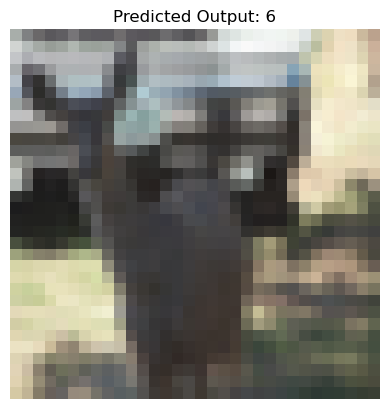

In [50]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Assuming you have your model predictions stored in a variable named 'y_pred_prob'
# Generate a random index within the range of the test samples
index = random.randint(0, len(y_pred_prob) - 1)

# Find the index of the highest probability value
highest_prob_index = np.argmax(y_pred_prob[index])

# Get the corresponding output value
output_value = highest_prob_index + 1  # Adding 1 because indexing starts from 0

print("Highest probability value:", y_pred_prob[index][highest_prob_index])
print("Corresponding output value:", output_value)

# Plot the image corresponding to the random index
plt.imshow(x_test[index])
plt.title(f"Predicted Output: {output_value}")
plt.axis('off')
plt.show()

### Let's use a trained neural network
You can run the following code many times

Note the recognition probabilities for each image

1/1 [==============================] - 0s 29ms/step


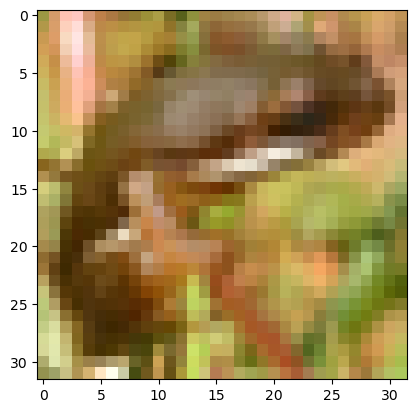

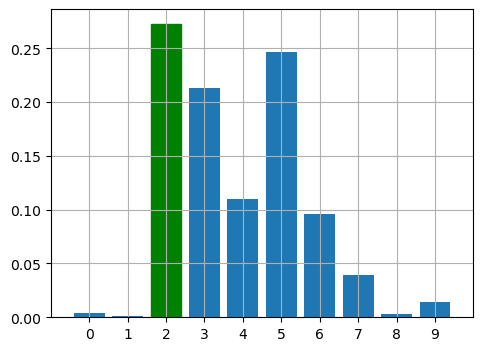

The predicted answer: bird 
 Correct answer: frog
['aircraft', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'hors', 'ship', 'truck']


In [51]:
from tensorflow.keras.preprocessing.image import array_to_img

# Class names in the CIFAR-10 dataset
classes=['aircraft', 'car', 'bird', 'cat', 'deer',
'dog', 'frog', 'hors', 'ship', 'truck']

# we take a random element 'random.randint()' from the test sample
# and observe: the neural network will guess or not
index = random.randint(0, x_test.shape[0])
plt.imshow(array_to_img(x_test[index]))

# test image conversion
x = x_test[index]
x = np.expand_dims(x, axis=0)

# start recognition
prediction = model.predict(x)
sample = x

# converting the result from one hot encoding format
ans = np.argmax(prediction)

fig = plt.figure(figsize=(12,4))

ax = fig.add_subplot(1, 2, 2)
bar_list = ax.bar(np.arange(10), prediction[0], align='center')
bar_list[ans].set_color('g')
ax.set_xticks(np.arange(10))
ax.set_xlim([-1, 10])
ax.grid('on')

plt.show()

print('The predicted answer: {}'.format((classes[ans])), "\n",
     'Correct answer: {}'.format(classes[y_test[index][0]]) )

print(classes)


# You can run this cell many times, and each time you will get a new picture,which
# this neural network will recognise with the probability indicated on the graph.

## Task 2:

Evaluate your model for different optimisers available in the Keras. 

https://keras.io/api/optimizers/

- Store the optimisers in an array.
- Use for loop to fit, compile, and  test your model.
- Plot the accuracy vs optimiser


In [3]:
# Create a list containing the names of optimisers (Don't use 'AdamW' and 'Adafactor')
# Create an empty list to store scores

# For every optimiser
   # compile your model
   # fit your model, use epochs=3 for each optimiser (otherwise the training will take a long time)
   # using model.evaluate() find score and append the score in a list

# Plot score vs optimiser 

Fitting model with optimizer: SGD
Epoch 1/3
1563/1563 [==============================] - 106s 67ms/step - loss: 1.9625 - accuracy: 0.2882 - val_loss: 1.7347 - val_accuracy: 0.3642
Epoch 2/3
1563/1563 [==============================] - 108s 69ms/step - loss: 1.5414 - accuracy: 0.4454 - val_loss: 1.4473 - val_accuracy: 0.4854
Epoch 3/3
1563/1563 [==============================] - 110s 70ms/step - loss: 1.3886 - accuracy: 0.5053 - val_loss: 1.4125 - val_accuracy: 0.4984
Fitting model with optimizer: RMSprop
Epoch 1/3
1563/1563 [==============================] - 127s 81ms/step - loss: 1.3042 - accuracy: 0.5384 - val_loss: 1.0989 - val_accuracy: 0.6136
Epoch 2/3
1563/1563 [==============================] - 113s 72ms/step - loss: 0.9878 - accuracy: 0.6564 - val_loss: 1.0800 - val_accuracy: 0.6320
Epoch 3/3
1563/1563 [==============================] - 113s 72ms/step - loss: 0.8212 - accuracy: 0.7153 - val_loss: 0.9848 - val_accuracy: 0.6589
Fitting model with optimizer: Adagrad
Epoch 1/3
1563

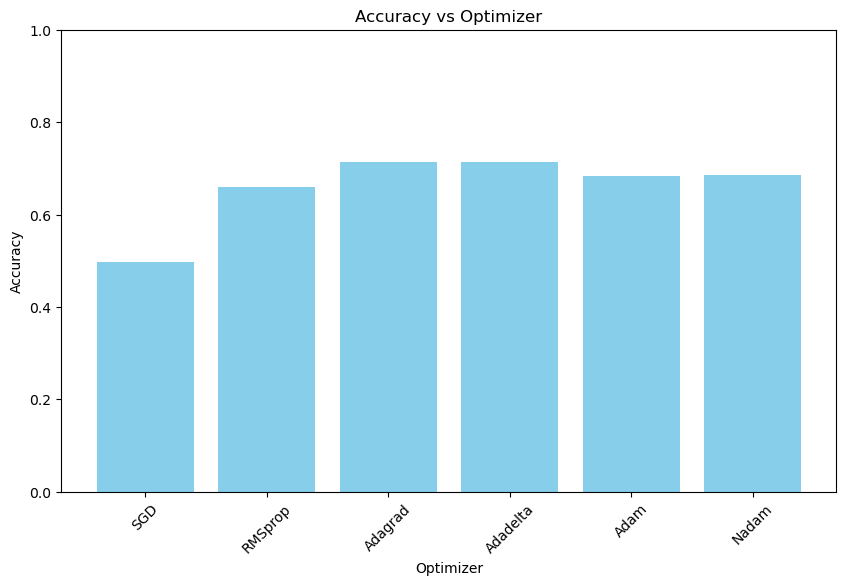

In [52]:
from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Nadam
import matplotlib.pyplot as plt

# List of optimizers (excluding 'AdamW' and 'Adafactor')
optimizers = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Nadam']

# Empty list to store scores
scores = []

# Define your model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# For every optimizer
for opt_name in optimizers:
    print(f"Fitting model with optimizer: {opt_name}")
    
    # Compile the model with current optimizer
    optimizer = eval(opt_name)()  # Convert optimizer name to optimizer object
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Fit the model
    history = model.fit(x_train, y_cat_train, epochs=3, batch_size=32, validation_data=(x_test, y_cat_test))
    
    # Evaluate the model and append score to the list
    score = model.evaluate(x_test, y_cat_test, verbose=0)[1]  # We're interested in accuracy, hence index 1
    scores.append(score)

# Plot accuracy vs optimizer
plt.figure(figsize=(10, 6))
plt.bar(optimizers, scores, color='skyblue')
plt.xlabel('Optimizer')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Optimizer')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()


# Lab logbook requirement: 
# Please ensure to document in your laboratory logbook a graphical representation depicting the train loss and validation loss trends. 
# Based on this analysis, determine the optimal number of epochs for training your model. 